Service Acc: masterdb@axiomatic-atlas-476707-k8.iam.gserviceaccount.com

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
# folder_path = "Acra_Data"

# # Get all CSV file paths inside the folder
# csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# # Read and combine all CSVs
# df = pd.concat((pd.read_csv(f, low_memory=False) for f in csv_files), ignore_index=True)

# df.columns = df.columns.str.upper()

# acra_data = df[[
#     "UEN",
#     "ENTITY_NAME",
#     "BUSINESS_CONSTITUTION_DESCRIPTION",
#     "ENTITY_TYPE_DESCRIPTION",
#     "ENTITY_STATUS_DESCRIPTION",
#     "REGISTRATION_INCORPORATION_DATE",
#     "PRIMARY_SSIC_CODE",
#     "SECONDARY_SSIC_CODE",
#     "UNIT_NO",
#     "LEVEL_NO",
#     "BUILDING_NAME",
#     "BLOCK",
#     "STREET_NAME",
#     "POSTAL_CODE"
# ]].copy()

# # Convert to proper data types
# acra_data['UEN'] = acra_data['UEN'].astype('string')
# acra_data['ENTITY_NAME'] = acra_data['ENTITY_NAME'].astype('string')
# acra_data['BUSINESS_CONSTITUTION_DESCRIPTION'] = acra_data['BUSINESS_CONSTITUTION_DESCRIPTION'].astype('string')
# acra_data['ENTITY_TYPE_DESCRIPTION'] = acra_data['ENTITY_TYPE_DESCRIPTION'].astype('string')
# acra_data['ENTITY_STATUS_DESCRIPTION'] = acra_data['ENTITY_STATUS_DESCRIPTION'].astype('string')
# acra_data['BLOCK'] = acra_data['BLOCK'].astype('string')
# acra_data['STREET_NAME'] = acra_data['STREET_NAME'].astype('string')
# acra_data['POSTAL_CODE'] = acra_data['POSTAL_CODE'].astype('string')
# acra_data['UNIT_NO'] = acra_data['UNIT_NO'].astype('string')
# acra_data['LEVEL_NO'] = acra_data['LEVEL_NO'].astype('string')
# acra_data['BUILDING_NAME'] = acra_data['BUILDING_NAME'].astype('string')
# acra_data['PRIMARY_SSIC_CODE'] = pd.to_numeric(acra_data['PRIMARY_SSIC_CODE'], errors='coerce')
# acra_data['SECONDARY_SSIC_CODE'] = pd.to_numeric(acra_data['SECONDARY_SSIC_CODE'], errors='coerce')

# # Date column
# acra_data['REGISTRATION_INCORPORATION_DATE'] = pd.to_datetime(acra_data['REGISTRATION_INCORPORATION_DATE'], errors='coerce')

# # Clean string columns
# for col in ['UEN', 'ENTITY_NAME', 'BUSINESS_CONSTITUTION_DESCRIPTION', 'ENTITY_TYPE_DESCRIPTION', 
#             'ENTITY_STATUS_DESCRIPTION', 'BLOCK', 'STREET_NAME', 'POSTAL_CODE', 'UNIT_NO', 'LEVEL_NO', 'BUILDING_NAME']:
#     acra_data[col] = acra_data[col].fillna('').str.strip().str.replace(r'\s+', ' ', regex=True).str.upper()

# acra_data.replace(['NA', 'N/A', '-', ''], np.nan, inplace=True)
# acra_data['REGISTRATION_INCORPORATION_DATE'] = acra_data['REGISTRATION_INCORPORATION_DATE'].dt.strftime('%d-%m-%Y')

# # Filter only live entities
# acra_data = acra_data[acra_data['ENTITY_STATUS_DESCRIPTION'].isin(['LIVE COMPANY', 'LIVE'])].reset_index(drop=True)

# # Exclude specific PRIMARY_SSIC_CODE values
# exclude_codes = [46900, 47719, 47749, 47539, 47536, 56123, 10711, 10712, 10719, 10732, 10733, 93209]
# acra_data = acra_data[~acra_data['PRIMARY_SSIC_CODE'].isin(exclude_codes)].reset_index(drop=True)

# # Classify BUSINESS_TYPE - Based on age + ownership type only
# reg_date = pd.to_datetime(acra_data['REGISTRATION_INCORPORATION_DATE'], format='%d-%m-%Y', errors='coerce', dayfirst=True)
# company_age_years = (pd.Timestamp.today() - reg_date).dt.days / 365.25
# ownership_type = acra_data['ENTITY_TYPE_DESCRIPTION'].astype(str)

# acra_data['BUSINESS_TYPE'] = np.nan

# # Rule 1: age > 3 AND (LOCAL COMPANY | LLP | SOLE PROPRIETORSHIP) → SME
# mask = (company_age_years > 3) & ownership_type.str.contains('LOCAL COMPANY|LIMITED LIABILITY PARTNERSHIP|SOLE PROPRIETORSHIP/ PARTNERSHIP', case=False, na=False)
# acra_data.loc[mask, 'BUSINESS_TYPE'] = 'SME'

# # Rule 2: age > 5 AND FOREIGN COMPANY BRANCH → Large Enterprise
# mask = (company_age_years > 5) & ownership_type.str.contains('FOREIGN COMPANY BRANCH', case=False, na=False) & acra_data['BUSINESS_TYPE'].isna()
# acra_data.loc[mask, 'BUSINESS_TYPE'] = 'Large Enterprise'

# # Rule 3: age > 5 AND (LOCAL COMPANY | LLP) → Franchise
# mask = (company_age_years > 5) & ownership_type.str.contains('LOCAL COMPANY|LIMITED LIABILITY PARTNERSHIP', case=False, na=False) & acra_data['BUSINESS_TYPE'].isna()
# acra_data.loc[mask, 'BUSINESS_TYPE'] = 'Franchise'

# # Rule 4: age < 5 AND SOLE PROPRIETORSHIP → Startup
# mask = (company_age_years < 5) & ownership_type.str.contains('SOLE PROPRIETORSHIP/ PARTNERSHIP', case=False, na=False) & acra_data['BUSINESS_TYPE'].isna()
# acra_data.loc[mask, 'BUSINESS_TYPE'] = 'Startup'

# # Fallback rules based on age only
# # Startup: Age ≤ 4
# # SME: Age 5–10
# # Large Enterprise: Age ≥ 11 OR (Foreign Company Branch with Age ≥ 7)
# unclassified = acra_data['BUSINESS_TYPE'].isna()
# acra_data.loc[unclassified & (company_age_years >= 11), 'BUSINESS_TYPE'] = 'Large Enterprise'
# acra_data.loc[unclassified & (company_age_years >= 7) & ownership_type.str.contains('FOREIGN COMPANY BRANCH', case=False, na=False), 'BUSINESS_TYPE'] = 'Large Enterprise'
# acra_data.loc[unclassified & (company_age_years >= 5) & (company_age_years <= 10) & acra_data['BUSINESS_TYPE'].isna(), 'BUSINESS_TYPE'] = 'SME'
# acra_data.loc[unclassified & (company_age_years <= 4) & acra_data['BUSINESS_TYPE'].isna(), 'BUSINESS_TYPE'] = 'Startbud'

# # Getting SSIC Code
# file_path = "./SSIC_Code/mapped_ssic_code.xlsx"
# mapped_ssic_code = pd.read_excel(file_path)
# mapped_ssic_code.columns = mapped_ssic_code.columns.str.strip().str.upper().str.replace(" ", "_")
# columns_to_keep = ["PARENT_INDUSTRY", "INDUSTRY_TYPE", "SUB_INDUSTRY", "SSIC_CODES", "DESCRIPTION"]
# mapped_ssic_code = mapped_ssic_code[columns_to_keep].copy()
# mapped_ssic_code["SSIC_CODES"] = pd.to_numeric(mapped_ssic_code["SSIC_CODES"], errors="coerce").fillna(0).astype(int)
# text_cols = ["PARENT_INDUSTRY", "INDUSTRY_TYPE", "SUB_INDUSTRY", "DESCRIPTION"]
# mapped_ssic_code[text_cols] = mapped_ssic_code[text_cols].apply(lambda col: col.astype(str).str.strip().str.title())
# mapped_ssic_code = mapped_ssic_code.drop_duplicates().reset_index(drop=True)

# # Merging
# acra_data["PRIMARY_SSIC_CODE"] = pd.to_numeric(acra_data["PRIMARY_SSIC_CODE"], errors="coerce").fillna(0).astype(int)
# acra_data["SECONDARY_SSIC_CODE"] = pd.to_numeric(acra_data["SECONDARY_SSIC_CODE"], errors="coerce").fillna(0).astype(int)
# acra_data_mapped = acra_data.merge(mapped_ssic_code, how="left", left_on="PRIMARY_SSIC_CODE", right_on="SSIC_CODES")
# acra_data_mapped = acra_data_mapped.drop(columns=["SSIC_CODES"], errors="ignore")

# print("\n✅ ACRA Business Type classification completed!")
# print(f"\nBusiness Type distribution:\n{acra_data_mapped['BUSINESS_TYPE'].value_counts(dropna=False)}")


In [6]:
import pandas as pd
import os

# Load parquet files
df1 = pd.read_parquet("./Staging/Silver/Silver_data_2.parquet", engine="fastparquet")
df2 = pd.read_parquet("./Staging/Silver/Silver_data_2_100.parquet", engine="fastparquet")

# Combine
combined_df = pd.concat([df1, df2], ignore_index=True)

# Clean values WITHOUT creating new columns
uen_series = combined_df["UEN"].fillna("").astype(str).str.strip().replace("", pd.NA)
phone_series = combined_df["Phones"].fillna("").astype(str).str.strip().replace("", pd.NA)

# Filter non-empty
uen_valid = uen_series.dropna()
phone_valid = phone_series.dropna()

# Duplicate checks
has_dup_uen = uen_valid.duplicated().any()
has_dup_phone = phone_valid.duplicated().any()

# Count phones not None
count_phone_not_none = len(phone_valid)

# Output
print("Duplicate UEN:", "Yes" if has_dup_uen else "No")
print("Duplicate Phones:", "Yes" if has_dup_phone else "No")
print("Total rows where Phones is not None:", count_phone_not_none)


Duplicate UEN: No
Duplicate Phones: No
Total rows where Phones is not None: 77


In [7]:
Fresh_Leads = combined_df.copy()
Fresh_Leads

,UEN,Status,Error,Emails,Phones,Website,Facebook,LinkedIn,Instagram,TikTok,RecordOwl_Link,operational_street,operational_unit,operational_postal_code,operational_address
0,201727805K,success,None,None,[+6567521170],https://www.mycareersfuture.gov.sg/job/educati...,None,None,None,None,https://recordowl.com/company/k-joy-educare-pt...,87 MARINE PARADE CENTRAL MARINE PARADE PROMENADE,03-213,440087,87 MARINE PARADE CENTRAL MARINE PARADE PROMENA...
1,53363337X,success,None,[enquiry@edlab.sg],[+6581981320],https://edlab.sg/,None,None,[https://www.instagram.com/edlab.sg],None,https://recordowl.com/company/tungstan-edlab,23 FERNVALE LANE THE TOPIARY,02-29,797501,23 FERNVALE LANE THE TOPIARY 02-29 Singapore 7...
2,202040317N,success,None,[enquiry@camelotinfant.com],[+6598118333],https://www.camelotinfant.com/,[https://www.facebook.com/camelot.river.valley],None,[https://www.instagram.com/camelotrivervalley],None,https://recordowl.com/company/preschool-infant...,45A CARMICHAEL ROAD,None,359826,45A CARMICHAEL ROAD Singapore 359826
3,202412473N,success,None,[admin@singaporeedusmart.com.sg],None,https://singaporeedusmart.com.sg/,None,None,None,None,https://recordowl.com/company/edusmart-learnin...,150 ORCHARD ROAD ORCHARD PLAZA,07-08,238841,150 ORCHARD ROAD ORCHARD PLAZA 07-08 Singapore...
4,53494470A,success,None,None,None,None,None,None,None,None,https://recordowl.com/company/natureve-gourmet,461A SENGKANG WEST WAY,05-119,791461,461A SENGKANG WEST WAY 05-119 Singapore 791461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,201326916W,success,None,None,[+6565139528],https://epigami.com/,None,[https://sg.linkedin.com/company/epigami],None,None,https://recordowl.com/company/epigami-pte-ltd,"7, WEST COAST PLACE, WEST COAST GARDENS",None,127560,"7, WEST COAST PLACE, WEST COAST GARDENS Singap..."
146,202032070E,success,None,None,[+6581129377],https://www.mycareersfuture.gov.sg/job/educati...,[https://www.facebook.com/chineselanguagecentr...,None,None,None,https://recordowl.com/company/chinese-language...,1 WEST COAST DRIVE NEWEST,01-53,128020,1 WEST COAST DRIVE NEWEST 01-53 Singapore 128020
147,202328283K,success,None,None,None,None,None,None,None,None,https://recordowl.com/company/yom-sho-construc...,804 KING GEORGE'S AVENUE JALAN BESAR PLAZA,11-148,200804,804 KING GEORGE'S AVENUE JALAN BESAR PLAZA 11-...
148,201135488K,success,None,[jenns.tuition@gmail.com],[+6567574177],https://astarerseducationhub.weebly.com/,None,None,None,None,https://recordowl.com/company/a-ers-education-...,236 YISHUN RING ROAD YISHUN HEARTS,01-1022,760236,236 YISHUN RING ROAD YISHUN HEARTS 01-1022 Sin...


In [31]:
import pandas as pd
import os

# Load parquet files
df1 = pd.read_parquet("./Staging/Silver/New_Leads_1.parquet", engine="fastparquet")
df2 = pd.read_parquet("./Staging/Silver/Silver_data_2_200.parquet", engine="fastparquet")

# print(df1.shape)
# print(df2.shape)

# Combine
combined_df = pd.concat([df1, df2], ignore_index=True)

combined_df.shape

# # Clean values WITHOUT creating new columns
# uen_series = combined_df["UEN"].fillna("").astype(str).str.strip().replace("", pd.NA)
# phone_series = combined_df["Phones"].fillna("").astype(str).str.strip().replace("", pd.NA)

# # Filter non-empty
# uen_valid = uen_series.dropna()
# phone_valid = phone_series.dropna()

# # Duplicate checks
# has_dup_uen = uen_valid.duplicated().any()
# has_dup_phone = phone_valid.duplicated().any()

# # Count phones not None BEFORE dropping duplicates
# count_phone_not_none_before = len(phone_valid)

# # Drop duplicate phones from the combined_df
# combined_df_no_dup_phones = combined_df.drop_duplicates(subset=['Phones'], keep='first')

# # Recount phones not None AFTER dropping duplicates
# phone_series_after = combined_df_no_dup_phones["Phones"].fillna("").astype(str).str.strip().replace("", pd.NA)
# phone_valid_after = phone_series_after.dropna()
# count_phone_not_none_after = len(phone_valid_after)

# # Output
# print("\n=== BEFORE dropping duplicate Phones ===")
# print("Duplicate UEN:", "Yes" if has_dup_uen else "No")
# print("Duplicate Phones:", "Yes" if has_dup_phone else "No")
# print("Total rows where Phones is not None:", count_phone_not_none_before)

# print("\n=== AFTER dropping duplicate Phones ===")
# print("Total rows in combined_df:", len(combined_df_no_dup_phones))
# print("Total rows where Phones is not None:", count_phone_not_none_after)

(597, 15)

In [32]:
combined_df.shape

(597, 15)

In [33]:
combined_df.to_parquet("./Staging/Silver/New_Leads_17_Nov.parquet", index=False, engine="fastparquet")

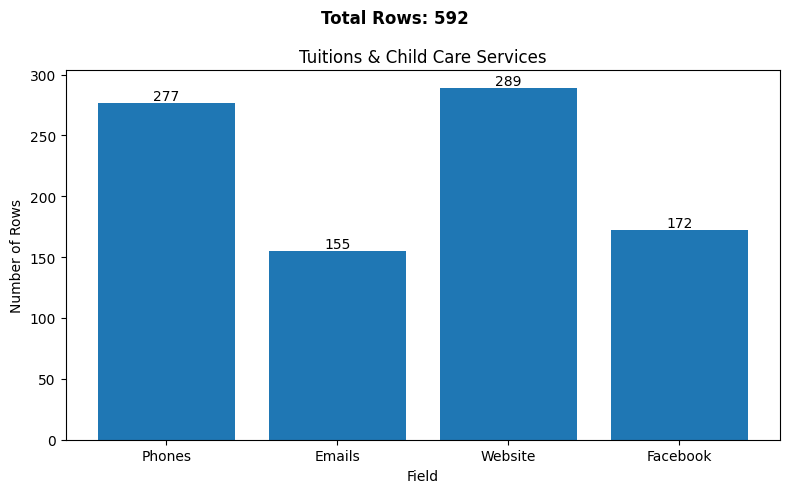

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Load parquet
df1 = pd.read_parquet("./Staging/Silver/New_Leads_17_Nov_2.parquet", engine="fastparquet")

# Columns to check
cols = ["Phones", "Emails", "Website", "Facebook"]

counts = {}

for col in cols:
    if col in df1.columns:
        counts[col] = df1[col].notna().sum()
    else:
        counts[col] = 0

# Total rows
total_rows = len(df1)
plt.figure(figsize=(8,5))
bars = plt.bar(counts.keys(), counts.values())

# Add count labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        str(height),
        ha='center',
        va='bottom',
        fontsize=10
    )

# Add total rows text above the plot area
plt.gcf().text(
    0.5, 0.95,  # x, y in figure coordinates
    f"Total Rows: {total_rows}",
    ha='center',
    fontsize=12,
    fontweight='bold'
)

plt.xlabel("Field")
plt.ylabel("Number of Rows")
plt.title("Tuitions & Child Care Services")  # Updated title
plt.tight_layout(rect=[0, 0, 1, 0.93])  # leave space at top
plt.show()


In [40]:
import pandas as pd

# Load the parquet file
df1 = pd.read_parquet("./Staging/Silver/New_Leads_17_Nov.parquet", engine="fastparquet")

# Ensure Phones column is treated as string for comparison
# If Phones is a list, join it into a single string
def normalize_phone(x):
    if isinstance(x, list):
        return ','.join([str(i) for i in x])
    return str(x)

df1['Phones'] = df1['Phones'].apply(lambda x: None if x is None else normalize_phone(x))

# Separate rows with None in Phones
none_phones = df1[df1['Phones'].isna()]

# Keep only rows with non-None Phones
df_clean = df1[df1['Phones'].notna()]

# Count unique and duplicate phone numbers
unique_count = df_clean['Phones'].nunique()
duplicate_count = df_clean.shape[0] - unique_count
print(f"Unique Phones: {unique_count}")
print(f"Duplicate Phones: {duplicate_count}")

# Remove duplicate phone numbers (keep first occurrence)
df_no_duplicates = df_clean.drop_duplicates(subset=['Phones'], keep='first')

# Combine back rows with None Phones
final_df = pd.concat([df_no_duplicates, none_phones], ignore_index=True)

# Final summary
print(f"Total rows after cleaning (including None Phones): {final_df.shape[0]}")


Unique Phones: 277
Duplicate Phones: 5
Total rows after cleaning (including None Phones): 592
